# Bike Rental Project by Juliette Seimandi ( Groupe 2 )

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


dfx = pd.read_csv("Bike Rental UCI dataset.csv")
dfx.head()


,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


# Plotting values to see the global distribution

In [213]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(dfx[col],dfx["demand"],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.tight_layout()

12


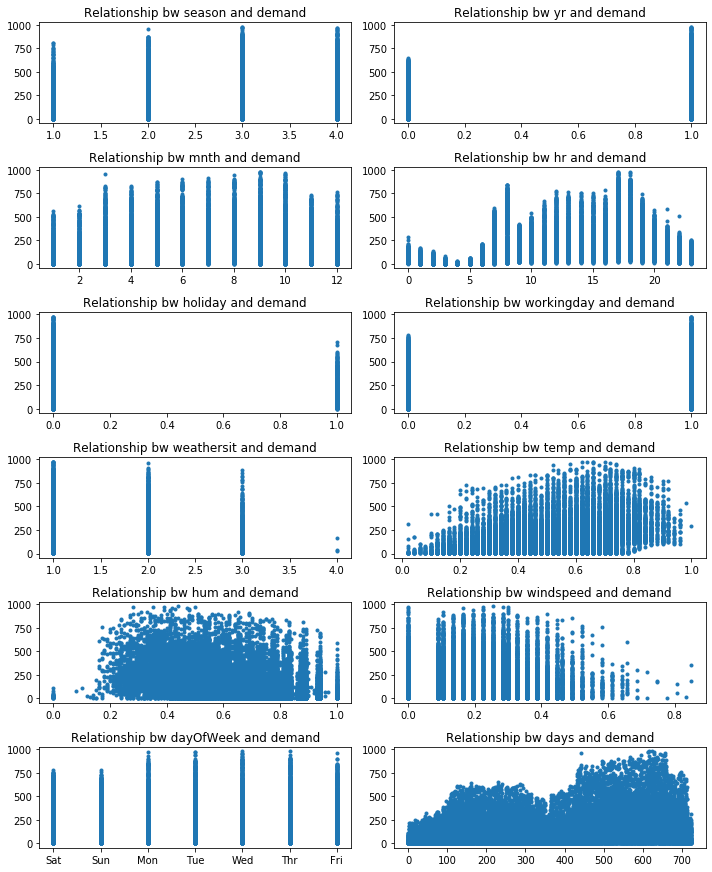

In [214]:
col=["season","yr","mnth","hr","holiday","workingday","weathersit","temp","hum","windspeed","dayOfWeek","days"]
plotFeatures(col,"Relationship bw %s and demand")

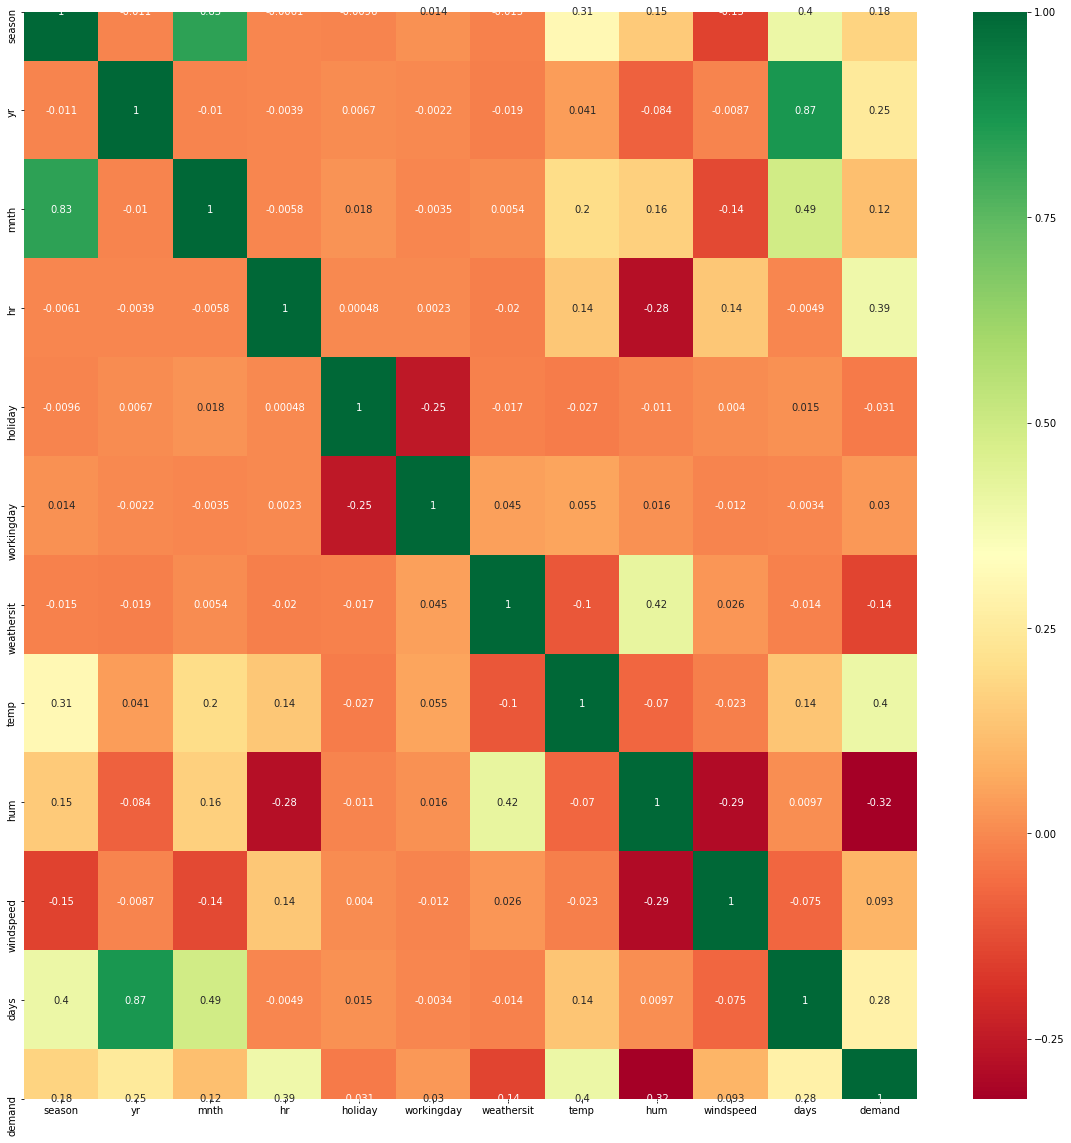

In [320]:
corrmat = dfx.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dfx[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [44]:
dfx.drop(['days'], axis=1)

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,Sat,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,Sat,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,Sat,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,Sat,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,Sat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.60,0.1642,Mon,119
17375,1,1,12,20,0,1,2,0.26,0.60,0.1642,Mon,89
17376,1,1,12,21,0,1,1,0.26,0.60,0.1642,Mon,90
17377,1,1,12,22,0,1,1,0.26,0.56,0.1343,Mon,61


In [322]:
df1=pd.get_dummies(data=dfx, columns=['season', 'yr','mnth','hr','holiday','workingday','weathersit','dayOfWeek'])
df1

,temp,hum,windspeed,days,demand,season_1,season_2,season_3,season_4,yr_0,...,weathersit_2,weathersit_3,weathersit_4,dayOfWeek_Fri,dayOfWeek_Mon,dayOfWeek_Sat,dayOfWeek_Sun,dayOfWeek_Thr,dayOfWeek_Tue,dayOfWeek_Wed
0,0.24,0.81,0.0000,0,16,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.80,0.0000,0,40,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.80,0.0000,0,32,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.75,0.0000,0,13,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.75,0.0000,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,0.1642,723,119,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
17375,0.26,0.60,0.1642,723,89,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
17376,0.26,0.60,0.1642,724,90,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17377,0.26,0.56,0.1343,724,61,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Founction 

In [226]:
class REG:
    
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y
    
    def cost_function(self, B):
        m = len(self.Y)
        J = np.sum((self.X.dot(B) - self.Y) ** 2)/(2 * m)
        return J
    

    def gradient_descent(self, B, alph):
    
        m = len(self.Y)
        iteration=0
        delta=1000
        CostL=[]
        ThetaL=[]
        lastCostValue= self.cost_function(B)+1
        
        while iteration<10000 and delta>0.00001:
            # Hypothesis Values
            h = self.X.dot(B)
            # Difference between Hypothesis and Actual Y
            loss = h - self.Y
            # Gradient Calculation
            gradient = self.X.T.dot(loss)/ m
            # Changing Values of B using Gradient
            B = B - alph * gradient
            ThetaL.append(B)
            # New Cost Value
            cost = self.cost_function(B)
            CostL.append(cost)
            delta = abs(lastCostValue - cost)
            lastCostValue = cost
            iteration+=1

        return B, lastCostValue,CostL,h

In [38]:
class relate:
    def __init__(self,h,Y):
        self.h=h
        self.Y=Y
         
    def rmse(self):
        mse = np.sum((self.h - self.Y)**2)
        rmse = np.sqrt(mse/m)
        return mse, rmse
    
    def r2(self):
        ssr = np.sum((self.h - self.Y)**2)
        sst = np.sum((self.Y - np.mean(self.Y))**2)
        r2_score = 1 - (ssr/sst)
        return ssr,sst,r2_score

In [286]:
class EqNorm:
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y
    def fonct(self,m):
        
        x_transpose = np.transpose(self.X) #transpose
        x_transpose_dot_x = x_transpose.dot(self.X) #product x.x.T
        temp_1 = np.linalg.inv(x_transpose_dot_x) #calculate the matrix inverse
        temp_2 = x_transpose.dot(self.Y)  #second partie x.T.Y
        Ɵ = temp_1.dot(temp_2) #theta calculation
        return x_transpose,x_transpose_dot_x,temp_1,temp_2,Ɵ

In [39]:
def Normalize(x):
    normal=(x-np.mean(x))/np.std(x)
    return normal

In [40]:
def drawCost(x):
    x_axes=x
    plt.xlabel('theta')
    plt.ylabel('cost values')
    plt.plot(x_axes) 
    plt.show()

In [206]:
class skPredict:
    
    def __init__(self,X,Y):
        self.X=X
        self.Y=Y
        
    def fit(self):
        regression_model = LinearRegression()  
        regression_model.fit(self.X, self.Y)
        y_predicted = regression_model.predict(self.X)
        return y_predicted
        
    def r2(self,y_predicted):
        rmse = mean_squared_error(self.Y, y_predicted)
        r2 = r2_score(self.Y, y_predicted)
        print('Slope:' ,regression_model.coef_)
        print('Intercept:', regression_model.intercept_)
        print('Root mean squared error: ', rmse)

# Data visualization

In [312]:
tab2=dfx[['temp','hum','windspeed','holiday','weathersit','demand']]
tab2
st2=tab2.sort_values(by=['holiday'],ascending=False,na_position='last')
dfhl=st2.loc[(dfx['holiday']==1),:]
dfhl

,temp,hum,windspeed,holiday,weathersit,demand
8689,0.24,0.41,0.3284,1,2,66
4323,0.64,0.83,0.0896,1,1,119
14539,0.66,0.94,0.0000,1,2,104
3482,0.64,0.94,0.1940,1,1,103
3483,0.64,0.94,0.1343,1,1,79
...,...,...,...,...,...,...
382,0.16,0.50,0.2537,1,2,57
381,0.16,0.47,0.2239,1,2,47
389,0.20,0.51,0.1940,1,1,71
390,0.18,0.55,0.2537,1,2,92


In [313]:
#convertir numeric data to float and normalize y
tmp_float_hl=np.array(dfhl["temp"]).astype(np.float)
hum_float_hl=np.array(dfhl["hum"]).astype(np.float)
winds_float_hl=np.array(dfhl["windspeed"]).astype(np.float)
y_hl=dfhl["demand"]
y_norm=Normalize(y_hl)

In [314]:
#creating matrix x while added a column of ones
m = len(dfhl["temp"])
x0 = np.ones(m)
x = np.stack((x0,tmp_float_hl,hum_float_hl,winds_float_hl))
X_HL=x.T
X_HL

#initialize our theta and creating Y matrix
B_HL = np.zeros((4,1))
y0 = np.zeros((len(y_norm),1))
y1=np.insert(y0,0,(y_norm), axis=1)
Y_HL=np.delete(y1,1,axis=1)

In [315]:
#using my model
r=REG(X_HL,Y_HL)
newB, lastCostValue,CostL,h =r.gradient_descent(B_HL, 1)
print(newB)
print(lastCostValue)

[[-0.44346008]
 [ 2.95016144]
 [-1.64504461]
 [ 0.41612859]]
0.27478912411607587


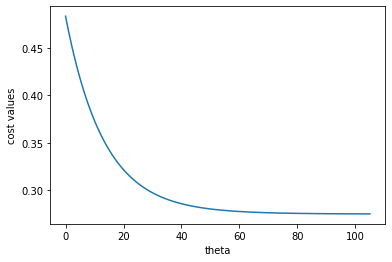

In [316]:
drawCost(CostL)

In [317]:
# compute my rmse and my r2 score
avw=relate(h,Y_HL)
mse, rmse=avw.rmse()
sr,sst,r2_score=avw.r2()
print(rmse)
print(r2_score)

0.741348740484207
0.4504020449824795


In [318]:
tab3=dfx[['temp','hum','windspeed','holiday','season','demand']]

st3=tab3.sort_values(by=['season'],ascending=False,na_position='last')

In [319]:
for i in range (1,5):
    
    dfSea=st3.loc[(dfx['season']==i) & (dfx['holiday']==1),:]
    tmp_float_sea=np.array(dfSea["temp"]).astype(np.float)
    hum_float_sea=np.array(dfSea["hum"]).astype(np.float)
    winds_float_sea=np.array(dfSea["windspeed"]).astype(np.float)
    y_sea=dfSea["demand"]
    y_norm=Normalize(y_sea)
    m = len(dfSea["temp"])
    x0 = np.ones(m)
    x = np.stack((x0,tmp_float_sea,hum_float_sea,winds_float_sea))
    X_Sea=x.T

    B_Sea = np.zeros((4,1))
    y0 = np.zeros((len(y_norm),1))
    y1=np.insert(y0,0,(y_norm), axis=1)
    Y_Sea=np.delete(y1,1,axis=1)
    
    r=REG(X_Sea,Y_Sea)
    newB, lastCostValue,CostL,h =r.gradient_descent(B_Sea, 0.5)
    print("Season :", i)
    print("New B :",newB)
    print("Last cost value",lastCostValue)
    
    avw=relate(h,Y_Sea)
    mse, rmse=avw.rmse()
    sr,sst,r2_score=avw.r2()
    print("RMSE :",rmse)
    print("R2 :",r2_score)
    print("\n")

Season : 1
New B : [[ 0.46740719]
 [ 0.8677452 ]
 [-1.78395216]
 [ 1.12515459]]
Last cost value 0.41521564633449914
RMSE : 0.9112908527667011
R2 : 0.16954898166373844


Season : 2
New B : [[-0.07954123]
 [ 2.17064494]
 [-2.38665141]
 [ 1.15288817]]
Last cost value 0.26134035339428313
RMSE : 0.7229801954677062
R2 : 0.4772996369614769


Season : 3
New B : [[-1.21371465]
 [ 4.16333505]
 [-2.86550249]
 [ 1.22379546]]
Last cost value 0.1856685445268728
RMSE : 0.6093907521250549
R2 : 0.6286429112244596


Season : 4
New B : [[-1.96930778]
 [ 5.309471  ]
 [-0.77246315]
 [ 1.68547837]]
Last cost value 0.2806036988989067
RMSE : 0.7491511075460848
R2 : 0.4387726180624747




# Plotting all the features

In [220]:
y=df1["demand"]
y_norm=Normalize(y)


In [ ]:
Creating my matrice

In [297]:

m = len(df1["temp"])
x0 = np.ones(m)

x= np.stack((x0,df1['temp'],df1['hum'],df1['windspeed'],df1['season_2'],df1['season_1'],df1['season_3'],df1['season_4'],df1['yr_0'],df1['yr_1'],df1['mnth_1'],df1['mnth_2'],df1['mnth_3'],df1['mnth_4'],df1['mnth_5'],df1['mnth_6'],df1['mnth_7'],df1['mnth_8'],df1['mnth_9'],df1['mnth_10'],df1['mnth_11'],df1['mnth_12'],df1['hr_0'],df1['hr_1'],df1['hr_2'],df1['hr_3'],df1['hr_4'],df1['hr_5'],df1['hr_6'],df1['hr_7'],df1['hr_8'],df1['hr_9'],df1['hr_10'],df1['hr_11'],df1['hr_12'],df1['hr_13'],df1['hr_14'],df1['hr_15'],df1['hr_16'],df1['hr_17'],df1['hr_18'],df1['hr_19'],df1['hr_20'],df1['hr_21'],df1['hr_22'],df1['hr_23'],df1['holiday_0'],df1['holiday_1'],df1['workingday_0'],df1['workingday_1'],df1['weathersit_1'],df1['weathersit_2'],df1['weathersit_3'],df1['weathersit_4'],df1['dayOfWeek_Fri'],df1['dayOfWeek_Mon'],df1['dayOfWeek_Sat'],df1['dayOfWeek_Sun'],df1['dayOfWeek_Thr'],df1['dayOfWeek_Tue'],df1['dayOfWeek_Wed']))
X=x.T

y0=np.zeros(m)
y = np.stack((y0,y_norm))
y1=np.delete(y,0,axis=0)
Y=y1.T



In [243]:
B = np.zeros((61,1))


In [244]:
ys=np.shape(Y)
xs=np.shape(X)
bs=np.shape(B)


(17379, 1) (17379, 61) (61, 1)


In [ ]:
Apply model

In [245]:
r=REG(X,Y)
r.cost_function(B)
newB, lastCostValue,CostL,h=r.gradient_descent(B,0.05)
print(newB,lastCostValue)

[[-0.0350091 ]
 [ 0.80390266]
 [-0.68108008]
 [ 0.05968884]
 [ 0.02986108]
 [-0.24032861]
 [ 0.02475183]
 [ 0.15070661]
 [-0.25371135]
 [ 0.21870226]
 [-0.1381607 ]
 [-0.08807107]
 [-0.0049373 ]
 [-0.05664153]
 [ 0.11985883]
 [ 0.05060863]
 [-0.03357199]
 [ 0.05580841]
 [ 0.1868022 ]
 [ 0.1005046 ]
 [-0.1184233 ]
 [-0.10878589]
 [-0.61490896]
 [-0.70199142]
 [-0.745237  ]
 [-0.79329883]
 [-0.81149666]
 [-0.73611187]
 [-0.44984153]
 [ 0.2177243 ]
 [ 0.91455901]
 [ 0.18394412]
 [-0.08478281]
 [ 0.04425213]
 [ 0.24014128]
 [ 0.21762092]
 [ 0.13947664]
 [ 0.18638713]
 [ 0.49237287]
 [ 1.25248076]
 [ 1.09269098]
 [ 0.55680783]
 [ 0.16321656]
 [-0.07954374]
 [-0.26346555]
 [-0.45600529]
 [ 0.02137482]
 [-0.05638392]
 [-0.04272832]
 [ 0.00771922]
 [ 0.10291557]
 [ 0.07424509]
 [-0.21081315]
 [-0.00135661]
 [ 0.00870367]
 [-0.02979107]
 [ 0.0469561 ]
 [-0.03330051]
 [-0.01041814]
 [-0.01571295]
 [-0.0014462 ]] 0.1609968328228432


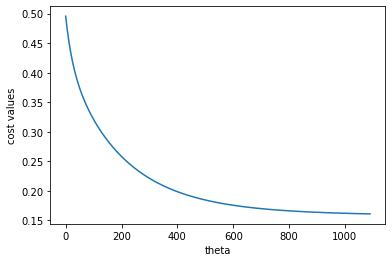

In [246]:
drawCost(CostL)

In [247]:
av=relate(h,Y)
mse, rmse=av.rmse()
sr,sst,r2_score=av.r2()
print(rmse)
print(r2_score)

0.5674624238037519
0.6779863975707692


In [248]:
sk=skPredict(X,Y)
y_pred=sk.fit()
#rmse,r2=sk.r2(y_pred)
#print('Root mean squared error: ', rmse)
#print('R2 score: ', r2)

# equation normal 


In [283]:
X1=np.delete(X1,0, 1)

In [284]:
print(X1)

[[0.24   0.81   0.     ... 0.     0.     0.    ]
 [0.22   0.8    0.     ... 0.     0.     0.    ]
 [0.22   0.8    0.     ... 0.     0.     0.    ]
 ...
 [0.26   0.6    0.1642 ... 0.     0.     0.    ]
 [0.26   0.56   0.1343 ... 0.     0.     0.    ]
 [0.26   0.65   0.1343 ... 0.     0.     0.    ]]


In [296]:
en=EqNorm(X1,Y)
x_transpose,x_transpose_dot_x,temp_1,temp_2,Ɵ=en.fonct(61)
print('tmp 1',temp_1)
print('tmp 2',temp_2)
print('theta',Ɵ)

tmp 1 [[ 8.48191371e-03  3.59921112e-05 -1.52913234e-04 ... -2.74198807e-02
  -2.83408794e-02 -3.74251589e-02]
 [ 3.59921112e-05  2.26218606e-03  5.80818267e-04 ... -6.46105976e-03
  -2.09240215e-02 -2.20383594e-02]
 [-1.52913234e-04  5.80818267e-04  4.42061887e-03 ...  3.83096599e-02
   3.77418203e-02  3.78488905e-02]
 ...
 [-2.10452407e-02 -4.78187595e-04  9.09963918e-03 ...  1.56618318e+12
   1.56618318e+12  1.56618318e+12]
 [-2.10507062e-02 -5.48004178e-04  9.08145094e-03 ...  1.56618318e+12
   1.56618318e+12  1.56618318e+12]
 [-2.10434025e-02 -5.55493545e-04  9.10029131e-03 ...  1.56618318e+12
   1.56618318e+12  1.56618318e+12]]
tmp 2 [[ 1354.50426157]
 [-1082.66518078]
 [  198.2233841 ]
 [  458.95442778]
 [-1832.34125032]
 [ 1153.93213772]
 [  219.45468483]
 [-2176.64688081]
 [ 2176.64688081]
 [ -748.74831782]
 [ -566.30638695]
 [ -276.53804061]
 [  -17.44633036]
 [  274.36471768]
 [  405.30482416]
 [  347.48097059]
 [  395.49566815]
 [  406.50333783]
 [  261.55274691]
 [  -96.08